Open AI CLIP

In [3]:
# Mount the google drive
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [1]:
!pip install matplotlib
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 625.5 kB/s eta 0:00:00


Save YouTube Video

In [87]:
import os
from pytube import YouTube

# Coors Light Chill Train
youtube_url_1 = "https://www.youtube.com/watch?v=9AdTgAfCyhU"

# Heineken Age restricted
#youtube_url_2 = "https://www.youtube.com/watch?v=Snz06TlhTzw"

# Heineken
youtube_url_2 = "https://www.youtube.com/watch?v=E_ANpv8Xbnk"

# Extract video ID from the URL
video_id = YouTube(youtube_url_2).video_id
local_video_path = f"{video_id}.mp4"

# Check if the video has already been downloaded
if os.path.exists(local_video_path):
    print("Video already exists, skipping download")
else:
    # Create a YouTube object
    yt = YouTube(youtube_url_2)

    # Select the highest resolution stream
    video_stream = yt.streams.get_highest_resolution()

    # Path to save the downloaded video with the video ID as the filename
    local_video_path = f"{video_id}.mp4"

    # Download the video
    video_stream.download(filename = local_video_path)

    print("Video downloaded successfully")

Video downloaded successfully


Play YouTube video

In [96]:
import ipywidgets as widgets
from IPython.display import display

video = widgets.Video.from_file(
    local_video_path,
    loop = False)

display(video)

Video(value=b'\x00\x00\x00\x18ftypmp42\x00\x00\x00\x00isommp42\x00\x00:\x7fmoov\x00\x00\x00lmvhd\x00\x00\x00\x…

Install libraries

In [6]:
!pip install torch torchvision torchaudio
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install opencv-python-headless

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [97]:
import torch
import clip
from PIL import Image
import cv2
import numpy as np

# Load the CLIP model
Contrastive Language-Image Pretraining (CLIP) is a model by OpenAI that understands both images and text by associating them in a shared embedding space.

### **Summary**
CLIP is a model that unifies the understanding of images and text by learning to associate them in a shared embedding space through contrastive pretraining. By using this unified representation, CLIP can perform image classification, zero-shot image classification, and image-text retrieval.

Contrastive pretraining is where CLIP learns to represent images and text in a shared embedding space. During pretraining, CLIP is presented with pairs of images and textual descriptions and is trained to predict whether they belong together or not.

Vision Transformer (ViT) is a neural network architecture for computer vision tasks. It processes images as sequences of patches. With patch embedding, positional embedding, and transformer encoder layers, ViT extracts features for tasks like image classification and object detection.

In [98]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device = device)

# Extract frames from a video at 1-second intervals
Break down a video into its individual picture frames.

## Summary
Take a video file as input and pull out individual frames from it. Start by opening the video file and determining its frame rate and total duration. Then, calculate how many frames to extract based on the duration. Iterate through the video, grabbing frames at regular intervals according to the frame rate and add them to a list. Once all frames are extracted, close the video file and return the list of frames.

In [99]:
def extract_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    total_seconds = total_frames / frame_rate
    target_frame_count = int(total_seconds)
    target_frame_index = 0
    for i in range(target_frame_count):
        cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_index)
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
        target_frame_index += int(frame_rate)
    cap.release()
    return frames

# Generate embeddings for each frame
Summarise what's happening in a picture in a simpler form.

### Summary
Process an input frame to create a numerical representation of its content. First, convert the frame into a format suitable for analysis. Then, using a pretrained neural network model, calculate a condensed numerical embedding that captures the essence of the frame's visual features. Finally, convert this embedding into a format that's easier to work with and return it as an array of numbers.

In [100]:
def generate_embedding(frame):
    frame_tensor = preprocess(Image.fromarray(frame)).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model.encode_image(frame_tensor)
    return embedding.cpu().numpy()[0]

# Store embeddings and image data in a Pandas DataFrame
Extract and summarise visual information from a video into a structured format for further analysis.

### Summary
Process a video file to extract frames and generate embeddings for each frame along with storing the frame image. First, extract frames from the video file. Then, iterate through each frame, generating an embedding using a separate function, and store both the frame number, its corresponding embedding, and the image itself in a list. After processing all frames, organise this data into a Pandas DataFrame with columns for the frame number, embedding data, and frame data. Finally, return this DataFrame containing all the extracted information.

In [101]:
from tqdm import tqdm as tqdm_progress
import pandas as pd

def store_frame_embedding_and_image(video_path):
    frames = extract_frames(video_path)
    data = []
    total_frames = len(frames)
    for i, frame in enumerate(tqdm_progress(frames, total = total_frames)):
        embedding = generate_embedding(frame)
        data.append((i+1, embedding, frame))

    df = pd.DataFrame(data, columns = ["frame_number", "embedding_data", "frame_data"])
    return df

In [102]:
df = store_frame_embedding_and_image(local_video_path)

100%|██████████| 30/30 [00:07<00:00,  3.78it/s]


In [103]:
df.head()

,frame_number,embedding_data,frame_data
0,1,"[-0.17814082, 0.033760928, 0.08818695, 0.00936...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,2,"[-0.4589306, 0.14857842, -0.1480239, 0.1698874...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,3,"[-0.3292468, 0.08108129, -0.23981586, 0.046622...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,4,"[-0.2740978, -0.29472354, 0.06194581, -0.13299...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,5,"[-0.23387149, 0.014917881, -0.18116932, 0.5282...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


# Calculate lengths of embeddings and frames
Examine the size characteristics of the data stored in the DataFrame.

### Summary
Two Pandas Series are created to calculate the lengths of the embedding data and frame data for each entry in the DataFrame. Find the minimum and maximum lengths among these calculated lengths.

In [104]:
embedding_lengths = df["embedding_data"].str.len()
frame_lengths = df["frame_data"].str.len()

# Find max and min lengths for embeddings and frames
min_embedding_length = embedding_lengths.min()
max_embedding_length = embedding_lengths.max()

min_frame_length = frame_lengths.min()
max_frame_length = frame_lengths.max()

print("Min length of embedding vectors:", min_embedding_length)
print("Max length of embedding vectors:", max_embedding_length)
print("Min length of frame data vectors:", min_frame_length)
print("Max length of frame data vectors:", max_frame_length)

Min length of embedding vectors: 512
Max length of embedding vectors: 512
Min length of frame data vectors: 720
Max length of frame data vectors: 720


# Calculate similarity for each embedding in the DataFrame
Quantify how similar the query embedding is to each frame's embedding in the DataFrame, providing a measure of similarity between the query and the frames.

### Summary
Measure the similarity between a given query embedding and a collection of embeddings stored in the DataFrame. Take the query embedding and the DataFrame as inputs. First, initialise an empty list to store the similarities between the query embedding and each frame's embedding. Then, iterate through each embedding in the DataFrame, converting it to a tensor for computation. Using a dot product operation, calculate the similarity between the query embedding and each frame's embedding. These similarities are stored in a list and returned.

In [105]:
def calculate_similarity(query_embedding, df):
    similarities = []
    query_embedding = torch.tensor(query_embedding, dtype=torch.float32).to(device)
    for embedding_data in df["embedding_data"]:
        frame_embedding = torch.tensor(embedding_data, dtype=torch.float32).to(device)
        similarity = (query_embedding @ frame_embedding.view(1, -1).T).squeeze().item()
        similarities.append(similarity)
    return similarities

# Example text query
## Encode query string into a vector representation
Summarise the meaning of a text query in a simpler numerical form.

### Summary
Process a textual query to generate a numerical representation of its meaning. First, tokenize the input query using CLIP's tokenizer. Then, encode the text tokens into a condensed numerical representation using a pretrained neural network model. Finally, convert this representation into a format that's easier to work with and return it as an array of numbers.

In [106]:
def encode_text_query(query):
    text_tokens = clip.tokenize([query]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_tokens)
    return text_features.cpu().numpy()[0]

In [107]:
query = input("Enter your query: ")
text_query_embedding = encode_text_query(query)
text_similarities = calculate_similarity(text_query_embedding, df)
df["text_similarity"] = text_similarities

### Coors LIGHT
### ALL ABOARD CHILL TRAIN
### Heineken

Enter your query: Heineken


### Find the top 5 best matches

In [108]:
top_text_matches = df.nlargest(5, "text_similarity")

print("Top 5 best matches:")
print(top_text_matches[["frame_number", "text_similarity"]].to_string(index = False))

Top 5 best matches:
 frame_number  text_similarity
            1        33.396873
           13        27.838747
           27        26.972816
            8        26.677702
            6        26.664885


### Show the frames

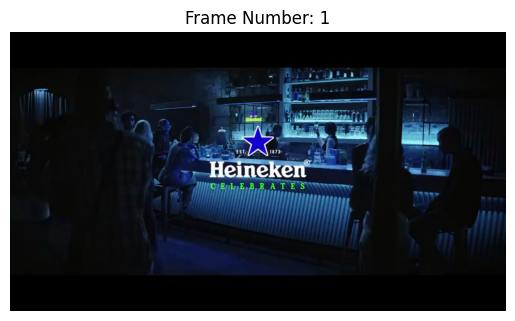

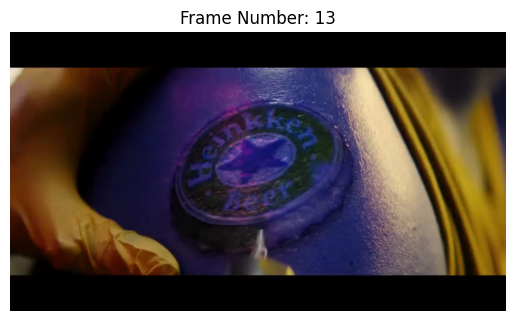

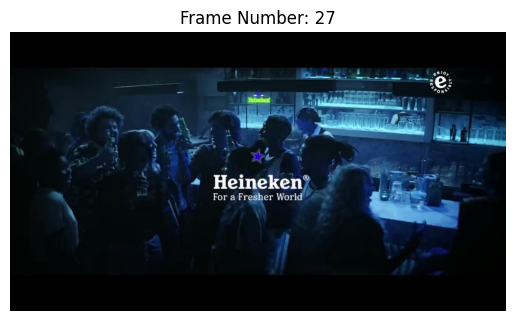

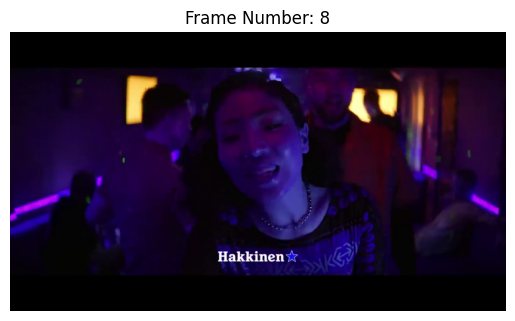

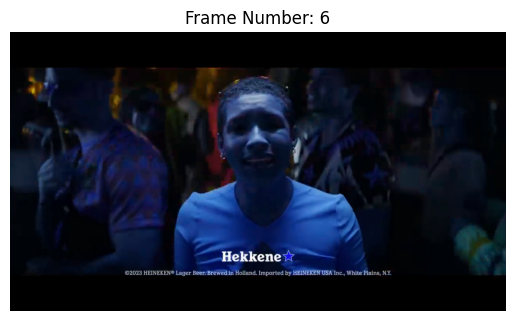

In [109]:
import matplotlib.pyplot as plt

def plot_frame(frame_data, frame_number):
    plt.imshow(frame_data)
    plt.title(f"Frame Number: {frame_number}")
    plt.axis("off")
    plt.show()

top_text_matches_indices = top_text_matches.index.tolist()
for index in top_text_matches_indices:
    frame_number = df.loc[index, "frame_number"]
    frame_data = df.loc[index, "frame_data"]
    plot_frame(frame_data, frame_number)

# Example image query
## Encode image into a vector representation
Summarise an image in a simpler numerical form.

### Summary
Preprocess an input image, pass it through a model to extract features, and return the resulting feature vector. This feature vector can then be used for similarity calculations.

In [110]:
def encode_image_query(image):
    image_tensor = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_tensor)
    return image_features.cpu().numpy()[0]

In [111]:
import requests
from IPython.display import Image, display
from PIL import Image as PILImage
from io import BytesIO

# Coors Light Can
image_url_1 = "https://www.coorslight.com/sites/coorslight/files/inline-images/coorslight-can.png"

# Coors train
image_url_2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuQtI6aw12th6aGfpX8f59PWNIiWVaaGlMtj4EeO_BXA&s"

# Heineken logo
image_url_3 = "https://www.publicis.com/wp-content/uploads/2021/09/862978-1500x1060.jpg"

response = requests.get(image_url_3)

if response.status_code == 200:
    display(Image(url = image_url_3))
    image_file = PILImage.open(BytesIO(response.content))

    image_query_embedding = encode_image_query(image_file)
    image_similarities = calculate_similarity(image_query_embedding, df)
    df["image_similarity"] = image_similarities
else:
    print("Failed to download the image, status code:", response.status_code)

### Find the top 5 best matches

In [112]:
top_image_matches = df.nlargest(5, "image_similarity")

print("Top 5 best matches:")
print(top_image_matches[["frame_number", "image_similarity"]].to_string(index = False))

Top 5 best matches:
 frame_number  image_similarity
            1         70.299576
           27         56.325287
            2         55.921608
           21         51.724281
           24         51.304916


### Show the frames

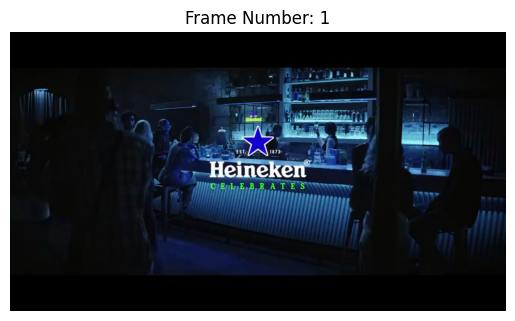

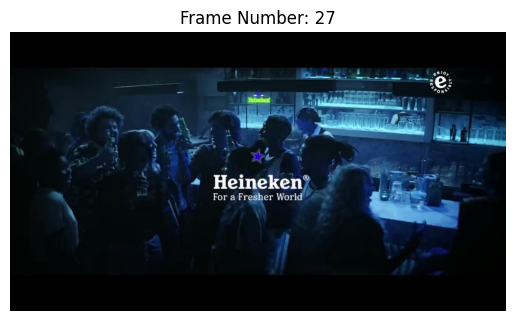

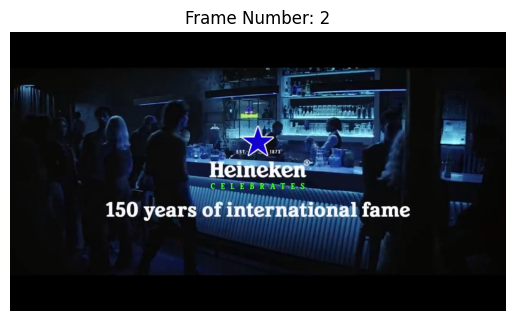

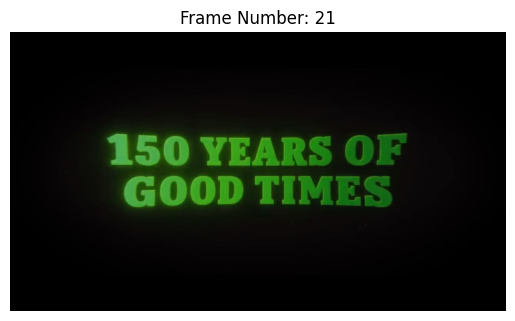

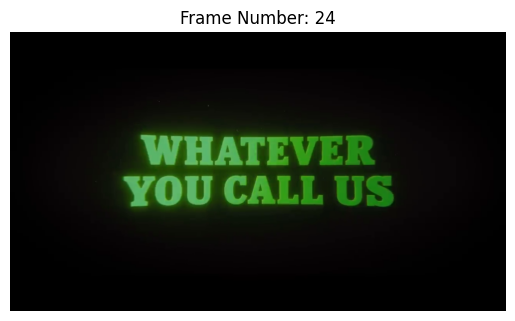

In [113]:
top_image_matches_indices = top_image_matches.index.tolist()
for index in top_image_matches_indices:
    frame_number = df.loc[index, "frame_number"]
    frame_data = df.loc[index, "frame_data"]
    plot_frame(frame_data, frame_number)

# Example combined query
When using CLIP with both text and images in a query, balance them by element-wise averaging.

## Summary
Balancing a query that includes both text and images when using CLIP involves finding an appropriate way to combine the embeddings of the textual query and the image query. A common approach is to use element-wise averaging.

Element-wise averaging means taking the average of corresponding elements in the two embeddings. This is done by adding the elements of the two embeddings together and then dividing by the number of elements. This ensures that both the textual and visual aspects of the query contribute equally to the final representation.

CLIP generates embeddings for both images and text using the ViT model. This model processes both images and text by first converting them into a common feature space through a shared set of transformer layers. The embeddings produced for images and text have the same dimensionality.

In [68]:
combined_query_embedding = (text_query_embedding + image_query_embedding) / 2
combined_similarities = calculate_similarity(combined_query_embedding, df)
df["combined_similarity"] = combined_similarities

## Find the top 5 best matches

In [69]:
top_combined_matches = df.nlargest(5, "combined_similarity")

print("Top 5 best matches:")
print(top_combined_matches[["frame_number", "combined_similarity"]].to_string(index = False))

Top 5 best matches:
 frame_number  combined_similarity
           83            53.955078
           84            51.708084
           81            46.349907
           33            46.161690
           14            45.718105


## Show the frames

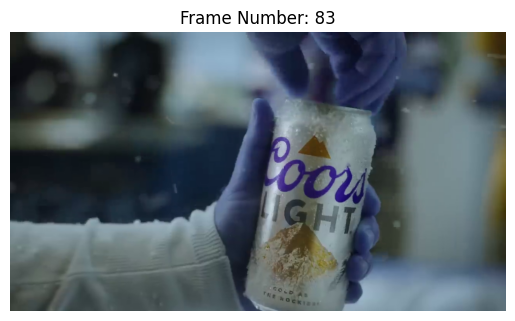

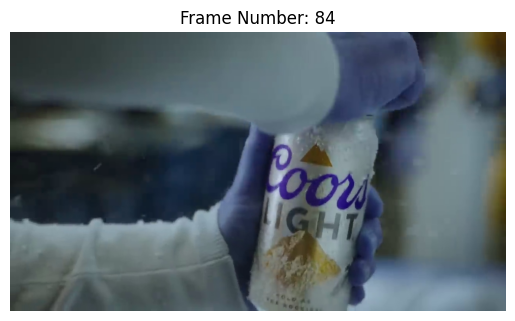

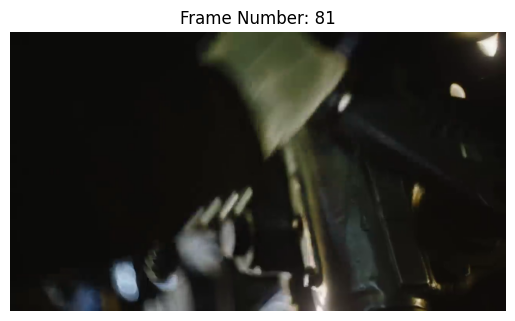

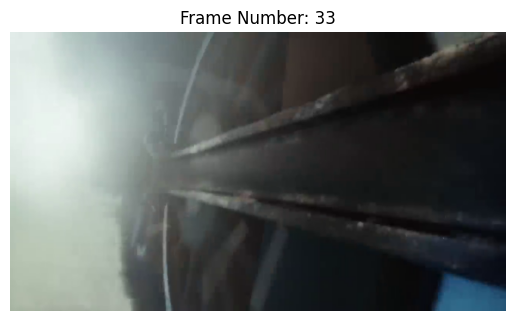

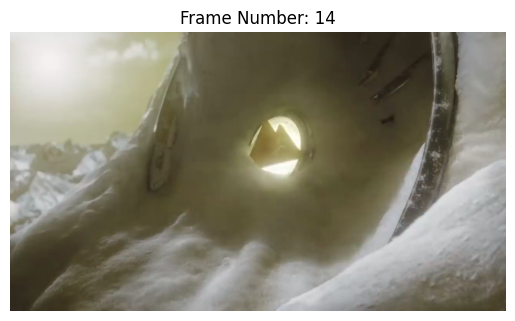

In [70]:
top_combined_matches_indices = top_combined_matches.index.tolist()
for index in top_combined_matches_indices:
    frame_number = df.loc[index, "frame_number"]
    frame_data = df.loc[index, "frame_data"]
    plot_frame(frame_data, frame_number)